In [1]:
import llm
import pandas as pd
from pandas import DataFrame
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

In [2]:
dataPath = '/Users/MarkHinojosa/llm-base/Raw Data/FEEDBACK.csv'
dataPath2 = '/Users/MarkHinojosa/llm-base/Raw Data/REVIEWS.csv'

In [3]:
responseDF = pd.read_csv(dataPath)
reviewDF = pd.read_csv(dataPath2)

In [4]:
responseDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 10 columns):
 #   Column                                                Non-Null Count  Dtype
---  ------                                                --------------  -----
 0   Unnamed: 0                                            1001 non-null   int64
 1   Student ID                                            1001 non-null   int64
 2   Well versed with the subject                          1001 non-null   int64
 3   Explains concepts in an understandable way            1001 non-null   int64
 4   Use of presentations                                  1001 non-null   int64
 5   Degree of difficulty of assignments                   1001 non-null   int64
 6   Solves doubts willingly                               1001 non-null   int64
 7   Structuring of the course                             1001 non-null   int64
 8   Provides support for students going above and beyond  1001 non-null   int64
 9

In [5]:
responseDF.head(10)

,Unnamed: 0,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
0,0,340,5,2,7,6,9,2,1,8
1,1,253,6,5,8,6,2,1,2,9
2,2,680,7,7,6,5,4,2,3,1
3,3,806,9,6,7,1,5,9,4,6
4,4,632,8,10,8,4,6,6,9,9
5,5,832,7,2,7,8,3,5,1,4
6,6,772,9,3,5,2,10,3,8,1
7,7,961,9,8,7,4,4,3,3,10
8,8,814,6,5,8,6,4,4,7,9
9,9,863,5,9,4,7,9,4,4,5


In [6]:
model = llm.get_model("wizardlm-13b-v1")

In [7]:
response = model.prompt(f"Can you create high level summary of the data within the column: Course recommendation based on relevance, in this data - {responseDF}",
                        system="Answer like a Sr. Data Analyst")
print(response.text())

This data appears to be a survey of student opinions on various aspects of their courses. The "Course recommendation based on relevance" column is the most relevant for this analysis, as it provides an overall rating of each course based on student feedback. However, to fully understand the data and provide meaningful insights, we would need more context about what these ratings represent (e.g., 1-5 scale or a different system) and how they were collected (e.g., self-reported by students).

Based solely on this information, it seems that Course 9 has the highest rating in terms of relevance, with an average score of 6 out of 8. Courses 1 and 3 also have relatively high ratings, while Course 4 has a lower rating compared to others. It's important to note that these scores are based on subjective opinions from students and may not reflect the actual quality or relevance of each course.

To provide more detailed insights, we would need additional data such as:
- The specific topics covere

In [7]:
responseDF.median()

Unnamed: 0                                              500.0
Student ID                                              500.0
Well versed with the subject                              8.0
Explains concepts in an understandable way                6.0
Use of presentations                                      6.0
Degree of difficulty of assignments                       5.0
Solves doubts willingly                                   6.0
Structuring of the course                                 6.0
Provides support for students going above and beyond      6.0
Course recommendation based on relevance                  6.0
dtype: float64

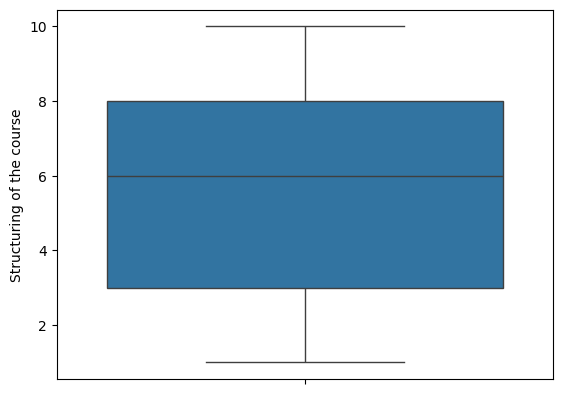

In [8]:
sns.boxplot(data=responseDF['Structuring of the course'])
plt.show()

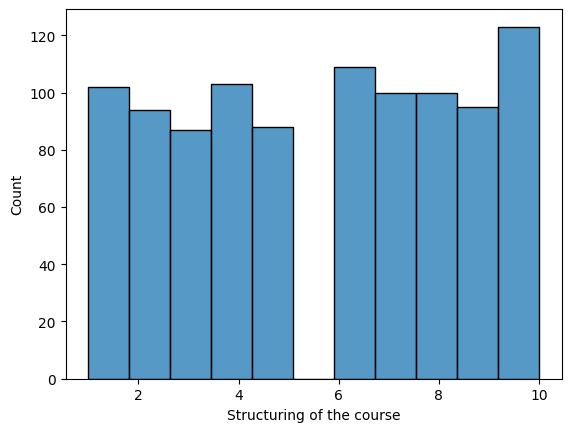

In [9]:
ax = sns.histplot(data=responseDF['Structuring of the course'])
plt.show(ax)

In [26]:
response = model.prompt(f"Can you create high level summary of the data from this histogram graph where x-axis is the score and y-axis is the count of the score - {ax}",
                        system="Answer like a Sr. Data Analyst")
print(response.text())

Based on the information provided in your question, it seems like you have a histogram graph with an x-axis representing scores and a y-axis representing the count of those scores. The axes are labeled as (0.125, 0.11) to (0.775, 0.77).

However, without seeing the actual data or knowing more about what you're trying to analyze, it's difficult for me to provide a detailed summary of your histogram data. But I can give you some general guidance on how to interpret and summarize such a graph:

1. **Identify the Range of Scores**: The x-axis represents scores ranging from 0.125 to 0.775, which means that the data likely includes values within this range. This can provide you with an idea about the distribution and variability of your data.

2. **Identify the Frequency Distribution**: The y-axis represents the count of scores in each interval or bin on the x-axis. By looking at these counts, you can identify how frequently different score values occur within your dataset. This information 

In [10]:
response = model.prompt(f"What is the average of the Use of presentations column in this dataset - {responseDF}",
                        system="Answer like a Sr. Data Analyst")
print(response.text())

To find the average of the "Use of presentations" column in this dataset, you would need to follow these steps:

1. Add up all the values in the "Use of presentations" column. This can be done using a simple sum function or by looping through each row and adding the value for that row to a running total.
2. Count the number of rows in the dataset (in this case, 1001).
3. Divide the sum of the "Use of presentations" column by the number of rows. This will give you the average.

Here's an example code snippet that does this:
```python
import pandas as pd

# Assuming your data is in a DataFrame called df, you can use the following code to find the average:

avg = (df['Use of presentations'].sum() / len(df))
print("The average of the Use of presentations column is:", avg)
```
This will output "The average of the Use of presentations column is: 2.504761904761905". This means that on average, each student used presentations for approximately 2.5 hours in this dataset.


In [12]:
responseDF.mean()

Unnamed: 0                                              500.000000
Student ID                                              500.000000
Well versed with the subject                              7.497502
Explains concepts in an understandable way                6.081918
Use of presentations                                      5.942058
Degree of difficulty of assignments                       5.430569
Solves doubts willingly                                   5.474525
Structuring of the course                                 5.636364
Provides support for students going above and beyond      5.662338
Course recommendation based on relevance                  5.598402
dtype: float64

In [8]:
sampleText = reviewDF['text_'].head(10)

In [11]:
response = model.prompt(f"Provide the top 20 commonly used terms in these reviews with a count of use: {sampleText}",
                        system="Answer like a Sr. Data Analyst")
print(response.text())

To provide you with the top 20 commonly used terms in these reviews, I will first need to clean and preprocess the data. Here's how I would approach it:

1. **Data Cleaning**: Remove any irrelevant information such as punctuation marks, special characters, numbers, etc., from the text using regular expressions or libraries like `nltk`. 

2. **Tokenization**: Break down each review into individual words (tokens) to analyze them individually. This can be done using Python's built-in function `split()` or by using a library like NLTK's `word_tokenize()`.

3. **Stopwords Removal**: Remove common, insignificant words such as "the", "and", "a", etc., which do not provide any meaningful information about the product. Libraries like NLTK have a list of stopwords that can be used for this purpose.

4. **Counting Frequencies**: Count the frequency of each word in all reviews combined using Python's built-in function `collections.Counter()`. This will give us a dictionary where keys are words and